Tommaso Peritore

In [11]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers.legacy import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

import os
import numpy as np
import matplotlib.pyplot as plt

seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# Exercise 12.1

Change at will and train your DNN by increasing the number of epochs to an adequate value. Try to use at least two other optimizers, different from SGD: watch the accuracy and loss for training and validation data and comment on the performances.

## Solution

In [2]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)


In [3]:
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('Before to_categorical: ')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('After to_categorical: ')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

Before to_categorical: 
X_train shape: (60000, 784)
X_test shape: (10000, 784)
After to_categorical: 
X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [6]:
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [12]:
def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [13]:
# training parameters
batch_size = 32
epochs = 15

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7578 - acc: 0.7760 - val_loss: 0.3087 - val_acc: 0.9136
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3790 - acc: 0.8923 - val_loss: 0.2351 - val_acc: 0.9322
Epoch 3/15
1875/1875 [==============================] - 2s 939us/step - loss: 0.3077 - acc: 0.9126 - val_loss: 0.1978 - val_acc: 0.9417
Epoch 4/15
1875/1875 [==============================] - 2s 990us/step - loss: 0.2624 - acc: 0.9265 - val_loss: 0.1734 - val_acc: 0.9482
Epoch 5/15
1875/1875 [==============================] - 2s 953us/step - loss: 0.2331 - acc: 0.9350 - val_loss: 0.1576 - val_acc: 0.9531
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2092 - acc: 0.9401 - val_loss: 0.1415 - val_acc: 0.9569
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1901 - acc: 0.9459 - val_loss: 0.1277 - val_acc: 0.9615
Epoch 8/15
1875/1875 [==============================] - 

313/313 [==============================] - 0s 586us/step - loss: 0.0843 - acc: 0.9737

Test loss: 0.08428347110748291
Test accuracy: 0.9736999869346619


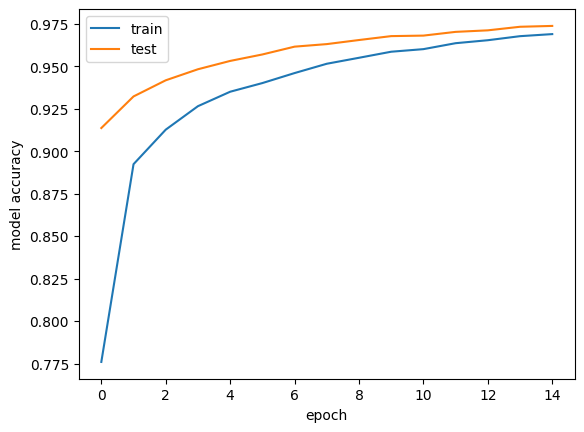

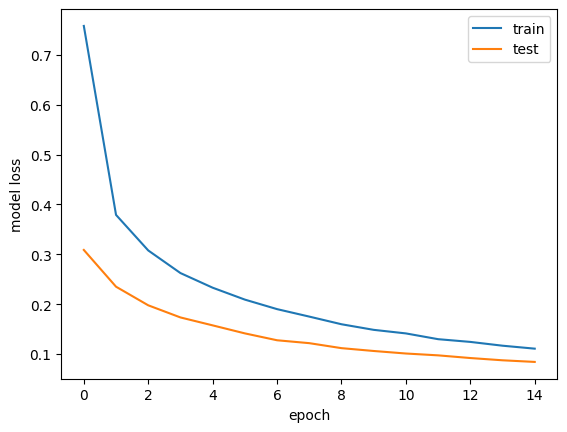

In [14]:
# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

Dropout, during training, slices off some artificial neurons, thus, training accuracy suffers.

Dropout, during testing, turns itself off and allows all of the ‘weak classifiers’ in the neural network to be used. Thus, testing accuracy improves with respect to training accuracy.

313/313 [==============================] - 0s 527us/step


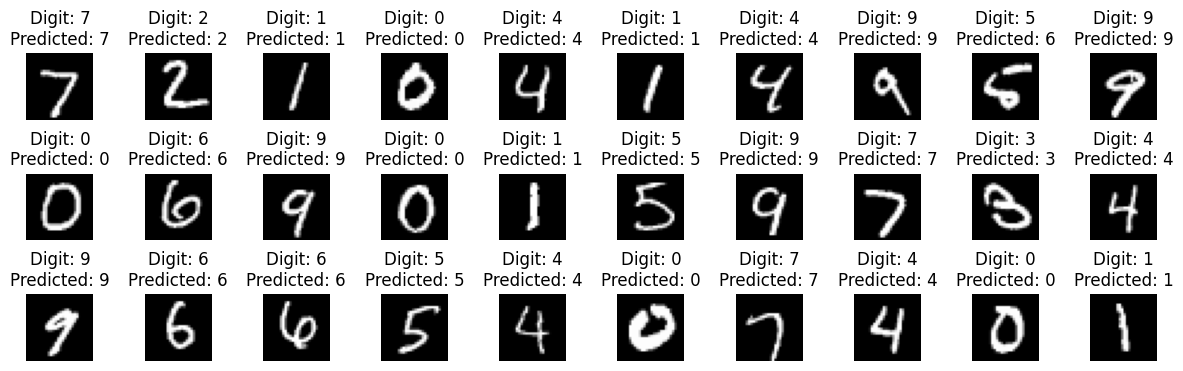

In [15]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize = (15,4))
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap = 'gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off')
    plt.subplots_adjust(hspace = 0.8)
plt.show()